# Model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore  # Import zscore from scipy.stats

In [ ]:
# Load data
data = pd.read_csv('Fraud.csv')

In [ ]:
# Data Cleaning
# Remove irrelevant columns
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Handling Missing Values
data.dropna(inplace=True)

In [ ]:
'''# Handling Outliers
z_scores = np.abs(data.apply(zscore))
filtered_entries = (z_scores < 3).all(axis=1)
data = data[filtered_entries]
'''

In [ ]:
'''# Handling Multicollinearity
correlation_matrix = data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
data.drop(to_drop, axis=1, inplace=True)'''

In [ ]:
# Data preprocessing
data = pd.get_dummies(data, columns=['type'])
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_scaled, y_train)


In [ ]:
# Model Evaluation
predictions = rf_classifier.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Feature Importance Analysis
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

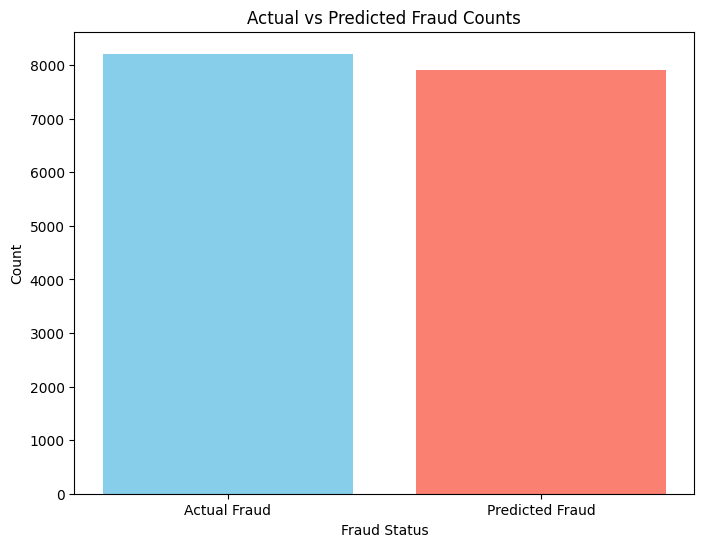

In [27]:
# Model Prediction on Full Data
data['predicted_fraud'] = rf_classifier.predict(scaler.transform(X))

# Calculate counts of actual fraud and predicted fraud
actual_fraud_count = data[data['isFraud'] == 1].shape[0]
predicted_fraud_count = data[data['predicted_fraud'] == 1].shape[0]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Actual Fraud', 'Predicted Fraud'], [actual_fraud_count, predicted_fraud_count], color=['skyblue', 'salmon'])
plt.title('Actual vs Predicted Fraud Counts')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

